# KNN Classification on SUV Data

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("suv_data.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# 0------> Not purchased
# 1------> Purchased

In [5]:
df.shape

(400, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### Seperate x and y

In [7]:
x= df.drop(columns=['User ID','Purchased'],axis=1)
y= df[['Purchased']]

In [8]:
x.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [9]:
y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [10]:
y.value_counts()

Purchased
0            257
1            143
Name: count, dtype: int64

### Seperate Categorical and contineous features

In [11]:
cat= x.columns[x.dtypes== 'object']
con= x.columns[x.dtypes!= 'object']

In [12]:
cat

Index(['Gender'], dtype='object')

In [13]:
con

Index(['Age', 'EstimatedSalary'], dtype='object')

### Create Pipelne for X

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
num_pipe= Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                          ('scaler', StandardScaler())])
cat_pipe= Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore'))])
pre= ColumnTransformer([('num',num_pipe,con),
                        ('cat',cat_pipe,cat)])

In [16]:
x_pre= pre.fit_transform(x)
x_pre

array([[-1.78179743, -1.49004624,  0.        ,  1.        ],
       [-0.25358736, -1.46068138,  0.        ,  1.        ],
       [-1.11320552, -0.78528968,  1.        ,  0.        ],
       ...,
       [ 1.17910958, -1.46068138,  1.        ,  0.        ],
       [-0.15807423, -1.07893824,  0.        ,  1.        ],
       [ 1.08359645, -0.99084367,  1.        ,  0.        ]])

In [17]:
cols= pre.get_feature_names_out()

In [18]:
cols

array(['num__Age', 'num__EstimatedSalary', 'cat__Gender_Female',
       'cat__Gender_Male'], dtype=object)

In [19]:
x_pre= pd.DataFrame(x_pre, columns=cols)

In [20]:
x_pre.head()

,num__Age,num__EstimatedSalary,cat__Gender_Female,cat__Gender_Male
0,-1.781797,-1.490046,0.0,1.0
1,-0.253587,-1.460681,0.0,1.0
2,-1.113206,-0.785290,1.0,0.0
3,-1.017692,-0.374182,1.0,0.0
4,-1.781797,0.183751,0.0,1.0


### Train Test split

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(x_pre, y, test_size=0.2, random_state=55)

In [22]:
xtrain.shape

(320, 4)

In [23]:
xtest.shape

(80, 4)

### Creating a base model

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=5)
model.fit(xtrain,ytrain)

KNeighborsClassifier()

In [25]:
model.score(xtrain,ytrain)

0.909375

In [26]:
model.score(xtest,ytest)

0.9375

### Tune hyperparams to increaase the accuracy

In [27]:
params= {'n_neighbors':[2,3,4,5,6,7,8,9]}

In [28]:
from sklearn.model_selection import GridSearchCV
knn= KNeighborsClassifier()
gscv= GridSearchCV(knn,param_grid=params ,cv=5,scoring='f1_macro')


In [29]:
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='f1_macro')

In [30]:
gscv.best_params_

{'n_neighbors': 7}

In [31]:
gscv.best_score_

0.8942025917145674

In [32]:
best_knn= gscv.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=7)

### Evaluate the model

In [33]:
ypred_tr= best_knn.predict(xtrain)
ypred_tr

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,

In [34]:
ytrain.head()

,Purchased
191,0
124,0
197,0
312,0
313,1


In [35]:
ypred_ts= best_knn.predict(xtest)
ypred_ts

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [36]:
ytest

,Purchased
26,1
258,1
128,0
126,0
6,0
...,...
4,0
119,0
41,0
332,0


In [37]:
best_knn.score(xtrain,ytrain)

0.915625

In [38]:
best_knn.score(xtest,ytest)

0.9375

### Confusio matrix

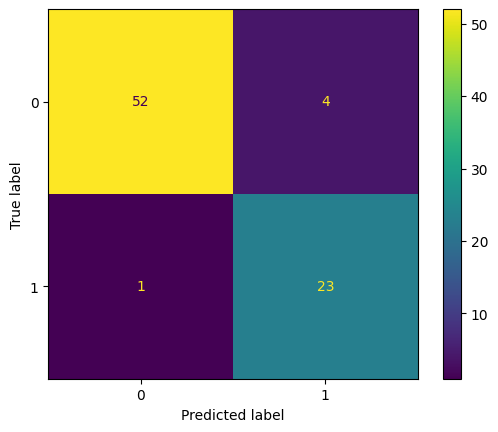

In [39]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf= confusion_matrix(ytest,ypred_ts)
cmd= ConfusionMatrixDisplay(cf,display_labels=best_knn.classes_)
cmd.plot()

### Report

In [40]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        56
           1       0.85      0.96      0.90        24

    accuracy                           0.94        80
   macro avg       0.92      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred_ts)

0.9375

In [42]:
best_knn.predict_proba(xtest)[0:10]

array([[0.        , 1.        ],
       [0.14285714, 0.85714286],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.85714286, 0.14285714],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

### Prediction for new input

In [43]:
df2= df.sample(25)
df2.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
241,15736228,Male,38,59000,0
79,15655123,Female,26,17000,0
128,15722758,Male,30,17000,0
64,15605000,Female,59,83000,0
238,15617877,Female,46,82000,0


In [44]:
xnew= df2.drop(columns=['Purchased'])
xnew.head()


,User ID,Gender,Age,EstimatedSalary
241,15736228,Male,38,59000
79,15655123,Female,26,17000
128,15722758,Male,30,17000
64,15605000,Female,59,83000
238,15617877,Female,46,82000


In [45]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 241 to 109
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          25 non-null     int64 
 1   Gender           25 non-null     object
 2   Age              25 non-null     int64 
 3   EstimatedSalary  25 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1000.0+ bytes


In [46]:
xnew.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
dtype: int64

In [47]:
xnew_pre= pre.transform(xnew)
xnew_pre[0:10]


array([[ 0.03295203, -0.31545197,  0.        ,  1.        ],
       [-1.11320552, -1.54877595,  1.        ,  0.        ],
       [-0.73115301, -1.54877595,  0.        ,  1.        ],
       [ 2.03872775,  0.38930459,  1.        ,  0.        ],
       [ 0.79705706,  0.35993973,  1.        ,  0.        ],
       [ 1.27462271,  2.23929055,  1.        ,  0.        ],
       [-1.20871865,  0.59485858,  0.        ,  1.        ],
       [ 0.22397829, -0.37418169,  0.        ,  1.        ],
       [-1.11320552,  0.30121002,  0.        ,  1.        ],
       [ 0.98808332,  0.12502088,  0.        ,  1.        ]])

In [48]:
xnew_pre= pd.DataFrame(xnew_pre, columns=cols)
xnew_pre.head()

,num__Age,num__EstimatedSalary,cat__Gender_Female,cat__Gender_Male
0,0.032952,-0.315452,0.0,1.0
1,-1.113206,-1.548776,1.0,0.0
2,-0.731153,-1.548776,0.0,1.0
3,2.038728,0.389305,1.0,0.0
4,0.797057,0.359940,1.0,0.0


### Perform prediction

In [49]:
pred = best_knn.predict(xnew_pre)
pred[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [50]:
prob= best_knn.predict_proba(xnew_pre)
prob

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.14285714, 0.85714286],
       [0.57142857, 0.42857143],
       [0.14285714, 0.85714286],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.42857143, 0.57142857],
       [0.85714286, 0.14285714],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.14285714, 0.85714286],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.85714286, 0.14285714],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.71428571, 0.28571429]])

In [51]:
prob= best_knn.predict_proba(xnew_pre)[:,1]
prob[0:5]

array([0.        , 0.        , 0.        , 0.85714286, 0.42857143])

### Save results in DataFrame

In [52]:
results= xnew[['Age','EstimatedSalary','Gender']]
results

,Age,EstimatedSalary,Gender
241,38,59000,Male
79,26,17000,Female
128,30,17000,Male
64,59,83000,Female
238,46,82000,Female
245,51,146000,Female
161,25,90000,Male
115,40,57000,Male
198,26,80000,Male
301,48,74000,Male


In [53]:
results['Purchased']= pred
results


,Age,EstimatedSalary,Gender,Purchased
241,38,59000,Male,0
79,26,17000,Female,0
128,30,17000,Male,0
64,59,83000,Female,1
238,46,82000,Female,0
245,51,146000,Female,1
161,25,90000,Male,0
115,40,57000,Male,0
198,26,80000,Male,0
301,48,74000,Male,1


In [54]:
results['Probability']= prob
results

,Age,EstimatedSalary,Gender,Purchased,Probability
241,38,59000,Male,0,0.000000
79,26,17000,Female,0,0.000000
128,30,17000,Male,0,0.000000
64,59,83000,Female,1,0.857143
238,46,82000,Female,0,0.428571
245,51,146000,Female,1,0.857143
161,25,90000,Male,0,0.000000
115,40,57000,Male,0,0.000000
198,26,80000,Male,0,0.000000
301,48,74000,Male,1,0.571429


In [55]:
results.to_csv('results_SUV', index=False)